# Basic analysis of rRNA processing

In [1]:
import numpy as np
import pandas as pd

In [2]:
samples = ["Ctrl_Mock_1", "Ctrl_Mock_2", "Ctrl_Mock_3", "Ctrl_cx_13", "Ctrl_cx_15", "Ctrl_cx_16", 
           "Ctrl_iso_9", "Ctrl_iso_10", "Ctrl_iso_12", "siZC3H8_1_18", "siZC3H8_1_19", "siZC3H8_1_21", 
           "siZC3H8_3_25", "siZC3H8_3_26", "siZC3H8_3_27", "siZC3H8_4_30", "siZC3H8_4_31", "siZC3H8_4_32"]

### Try example sample

In [3]:
df = pd.read_csv('/data/users/yuanhua/huenRNA/rRNAbam/%s/ReadsPerGene.out.tab' %samples[0], 
                 sep='\t', header=None)

In [4]:
df

,0,1,2,3
0,N_unmapped,13799295,13799295,13799295
1,N_multimapping,3317671,3317671,3317671
2,N_noFeature,457802,64334143,1714654
3,N_ambiguous,971403,19028,952375
4,RNA5SN1,995,91,904
5,RNA18SN1,23598715,150334,23448381
6,RNA5-8SN1,92307,1013,91294
7,RNA28SN1,40469773,1086386,39383387


In [5]:
#total input reads, uniquely mapped reads
df[1].values.sum(), df[1].values[2:].sum()

(82707961, 65590995)

In [6]:
f = open('/data/users/yuanhua/huenRNA/rRNAbam/%s/Log.final.out' %samples[0])
lines = f.readlines()
f.close()

total_reads = float(lines[5].split("\t")[1].strip())
mapped_reads = float(lines[8].split("\t")[1].strip())
unmapped_reads = float(lines[32].split("\t")[1].strip())
total_reads, mapped_reads, mapped_reads/total_reads, unmapped_reads, unmapped_reads/total_reads

(82707961.0, 65590995.0, 0.7930433081284642, 13509848.0, 0.16334398571378153)

### Parse all samples

In [7]:
reads_all = []

for samp in samples:    
    _df = pd.read_csv('/data/users/yuanhua/huenRNA/rRNAbam/%s/ReadsPerGene.out.tab' %samp, 
                      sep='\t', header=None)
    _seg_reads = _df[1].values[-4:].sum()
    _mapped_reads = _df[1].values[2:].sum()
    _unmapped_reads = _df[1].values[0]
    _total_reads = _df[1].values.sum()
    _sum_reads = [_total_reads, _unmapped_reads, _mapped_reads, _seg_reads]
    
    reads_all.append(np.append(_sum_reads, _df[1].values[-4:]))

In [8]:
np.array(reads_all)

array([[82707961, 13799295, 65590995, 64161790,      995, 23598715,
           92307, 40469773],
       [59631625, 13034100, 44338866, 43388503,       66, 15489300,
           49219, 27849918],
       [71657403, 14445646, 54333546, 53041030,      318, 18937028,
           65321, 34038363],
       [82429272, 16686091, 62186932, 61143219,      644, 21353082,
           42837, 39746656],
       [58781236, 12873568, 43344669, 42534847,      112, 15363988,
           32284, 27138463],
       [70092840, 12985166, 54350203, 53235144,     2214, 18967886,
           32739, 34232305],
       [76390650, 14842656, 58383321, 56953877,      138, 20663775,
          102012, 36187952],
       [55259204, 10980254, 42050674, 41013202,       66, 15059522,
           66264, 25887350],
       [60321399, 10740950, 47138748, 45868482,      124, 17053182,
           64862, 28750314],
       [61750709, 14960398, 44544871, 43475385,       58, 16189416,
           59446, 27226465],
       [56400556, 13071737, 41

In [9]:
columns = ['input_reads', 'unmapped_reads', 'unique_mapped', 'segment_count', 
           'RNA5SN1', 'RNA18SN1', 'RNA5.8SN1', 'RNA28SN1']

df_counts = pd.DataFrame(np.array(reads_all, dtype=int), columns=columns, index=samples)
df_counts

,input_reads,unmapped_reads,unique_mapped,segment_count,RNA5SN1,RNA18SN1,RNA5.8SN1,RNA28SN1
Ctrl_Mock_1,82707961,13799295,65590995,64161790,995,23598715,92307,40469773
Ctrl_Mock_2,59631625,13034100,44338866,43388503,66,15489300,49219,27849918
Ctrl_Mock_3,71657403,14445646,54333546,53041030,318,18937028,65321,34038363
Ctrl_cx_13,82429272,16686091,62186932,61143219,644,21353082,42837,39746656
Ctrl_cx_15,58781236,12873568,43344669,42534847,112,15363988,32284,27138463
Ctrl_cx_16,70092840,12985166,54350203,53235144,2214,18967886,32739,34232305
Ctrl_iso_9,76390650,14842656,58383321,56953877,138,20663775,102012,36187952
Ctrl_iso_10,55259204,10980254,42050674,41013202,66,15059522,66264,25887350
Ctrl_iso_12,60321399,10740950,47138748,45868482,124,17053182,64862,28750314
siZC3H8_1_18,61750709,14960398,44544871,43475385,58,16189416,59446,27226465


In [10]:
df_table = np.array(reads_all, dtype=float)
df_table[:, 3:] = df_table[:, 3:] / df_table[:, 2:3]
df_table[:, 1:3] = df_table[:, 1:3] / df_table[:, 0:1]

df_out = pd.DataFrame(df_table, columns=columns, index=samples)
df_out

,input_reads,unmapped_reads,unique_mapped,segment_count,RNA5SN1,RNA18SN1,RNA5.8SN1,RNA28SN1
Ctrl_Mock_1,82707961.0,0.166844,0.793043,0.978210,1.516977e-05,0.359786,0.001407,0.617002
Ctrl_Mock_2,59631625.0,0.218577,0.743546,0.978566,1.488536e-06,0.349339,0.001110,0.628115
Ctrl_Mock_3,71657403.0,0.201593,0.758241,0.976211,5.852738e-06,0.348533,0.001202,0.626470
Ctrl_cx_13,82429272.0,0.202429,0.754428,0.983217,1.035587e-05,0.343369,0.000689,0.639148
Ctrl_cx_15,58781236.0,0.219008,0.737390,0.981317,2.583939e-06,0.354461,0.000745,0.626108
Ctrl_cx_16,70092840.0,0.185257,0.775403,0.979484,4.073582e-05,0.348994,0.000602,0.629847
Ctrl_iso_9,76390650.0,0.194299,0.764273,0.975516,2.363689e-06,0.353933,0.001747,0.619834
Ctrl_iso_10,55259204.0,0.198705,0.760971,0.975328,1.569535e-06,0.358128,0.001576,0.615623
Ctrl_iso_12,60321399.0,0.178062,0.781460,0.973053,2.630532e-06,0.361766,0.001376,0.609908
siZC3H8_1_18,61750709.0,0.242271,0.721366,0.975991,1.302058e-06,0.363441,0.001335,0.611214


In [11]:
df_counts.to_csv('../table_rRNA_mapping.csv')
df_out.to_csv('../table_rRNA_mapping_percent.csv', float_format='%.3e')

## Potential Issues
* For STAR counting: it says using the [htseq-count](https://htseq.readthedocs.io/en/master/htseqcount.html)'s
  default setting, including `--mode union`, but what we need is `--mode intersection-strict`. Other 
  parameters `--nonunique none` is fine.
  
* For htseq-count: it doesn't recognised paired reads, so will count as reads not read pairs (i.e., fragments).

In [12]:
htcounts_all = []

for samp in samples:    
    _df = pd.read_csv('/data/users/yuanhua/huenRNA/rRNAbam/%s/htseq_count.tsv' %samp, 
                      sep='\t', header=None)
    _seg_reads = _df[1].values[:4].sum()
    _mapped_reads = _df[1].values.sum()
    _unmapped_reads = None
    _total_reads = _df[1].values.sum()
    _sum_reads = [_total_reads, _unmapped_reads, _mapped_reads, _seg_reads]
    
    htcounts_all.append(np.append(_sum_reads, _df[1].values[[3, 0, 2, 1]]))
    
htcounts_all = np.array(htcounts_all)
htcounts_all[:, 0] = np.array(reads_all, dtype=int)[:, 0] * 2

In [13]:
_df

,0,1
0,RNA18SN1,30781671
1,RNA28SN1,53227701
2,RNA5-8SN1,6639
3,RNA5SN1,184
4,__no_feature,1394137
5,__ambiguous,0
6,__too_low_aQual,0
7,__not_aligned,0
8,__alignment_not_unique,4284581


In [14]:
columns = ['input_reads', 'unmapped_reads', 'unique_mapped', 'segment_count', 
           'RNA5SN1', 'RNA18SN1', 'RNA5.8SN1', 'RNA28SN1']

df_htcounts = pd.DataFrame(htcounts_all, columns=columns, index=samples)
df_htcounts

,input_reads,unmapped_reads,unique_mapped,segment_count,RNA5SN1,RNA18SN1,RNA5.8SN1,RNA28SN1
Ctrl_Mock_1,165415922,None,137334200,128370936,1977,47313469,12637,81042853
Ctrl_Mock_2,119263250,None,92862199,87011235,110,31161794,6050,55843281
Ctrl_Mock_3,143314806,None,114023076,106574245,616,38229218,10459,68333952
Ctrl_cx_13,164858544,None,131025659,122959166,1282,43208270,11340,79738274
Ctrl_cx_15,117562472,None,91487290,85625263,215,31128314,7701,54489033
Ctrl_cx_16,140185680,None,113816602,107282645,4413,38602172,10967,68665093
Ctrl_iso_9,152781300,None,122657182,113937666,222,41542386,11325,72383733
Ctrl_iso_10,110518408,None,88244347,82161021,107,30288359,7290,51865265
Ctrl_iso_12,120642798,None,98801463,92175275,223,34509871,8929,57656252
siZC3H8_1_18,123501418,None,93238560,87200110,104,32643619,6861,54549526


In [15]:
df_ht_table = np.array(htcounts_all, dtype=float)
df_ht_table[:, 3:] = df_ht_table[:, 3:] / df_ht_table[:, 2:3]
df_ht_table[:, 1:3] = df_ht_table[:, 1:3] / df_ht_table[:, 0:1]

df_htout = pd.DataFrame(df_ht_table, columns=columns, index=samples)
df_htout

,input_reads,unmapped_reads,unique_mapped,segment_count,RNA5SN1,RNA18SN1,RNA5.8SN1,RNA28SN1
Ctrl_Mock_1,165415922.0,NaN,0.830236,0.934734,1.439554e-05,0.344513,0.000092,0.590114
Ctrl_Mock_2,119263250.0,NaN,0.778632,0.936993,1.184551e-06,0.335570,0.000065,0.601356
Ctrl_Mock_3,143314806.0,NaN,0.795613,0.934673,5.402415e-06,0.335276,0.000092,0.599299
Ctrl_cx_13,164858544.0,NaN,0.794776,0.938436,9.784343e-06,0.329770,0.000087,0.608570
Ctrl_cx_15,117562472.0,NaN,0.778201,0.935925,2.350053e-06,0.340247,0.000084,0.595591
Ctrl_cx_16,140185680.0,NaN,0.811899,0.942592,3.877290e-05,0.339161,0.000096,0.603296
Ctrl_iso_9,152781300.0,NaN,0.802829,0.928911,1.809923e-06,0.338687,0.000092,0.590130
Ctrl_iso_10,110518408.0,NaN,0.798458,0.931063,1.212542e-06,0.343233,0.000083,0.587746
Ctrl_iso_12,120642798.0,NaN,0.818959,0.932934,2.257052e-06,0.349285,0.000090,0.583557
siZC3H8_1_18,123501418.0,NaN,0.754959,0.935237,1.115418e-06,0.350109,0.000074,0.585053


In [16]:
df_htcounts.to_csv('../table_htseq_rRNA_mapping.csv')
df_htout.to_csv('../table_htseq_rRNA_mapping_percent.csv', float_format='%.3e')

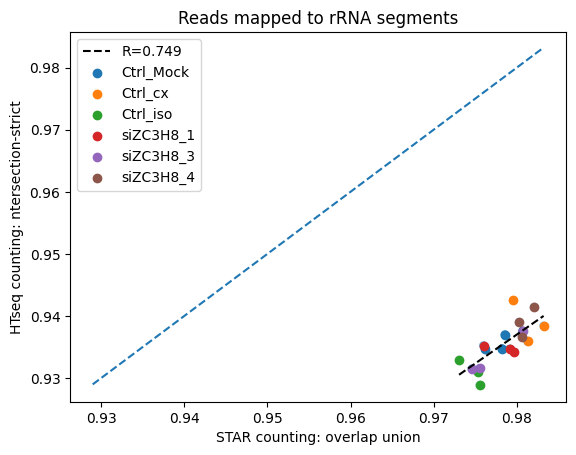

In [17]:
import hilearn
import matplotlib.pyplot as plt

color_groups = np.array(['_'.join(x.split('_')[:2]) for x in df_out.index])
hilearn.corr_plot(df_out['segment_count'].values, df_htout['segment_count'].values)
for _group in np.unique(color_groups):
    _idx = color_groups == _group
    plt.scatter(df_out['segment_count'].values[_idx], 
                df_htout['segment_count'].values[_idx],
                label=_group)
plt.plot([0.929, 0.983], [0.929, 0.983], '--')
plt.xlabel('STAR counting: overlap union')
plt.ylabel('HTseq counting: ntersection-strict')
plt.title('Reads mapped to rRNA segments')
plt.legend()
plt.show()